<a href="https://colab.research.google.com/github/OjasTamhankar/Machine-Learning-Lab/blob/main/Experiment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import make_blobs


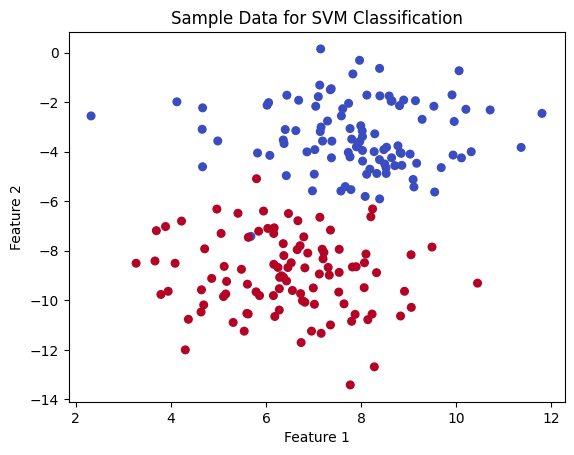

In [4]:
# Create a synthetic dataset for binary classification
X, y = make_blobs(n_samples=200, centers=2, random_state=6, cluster_std=1.5)

# Visualize dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
plt.title("Sample Data for SVM Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [5]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [6]:
# Create SVM classifier with linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train model on training data
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [7]:
# Predict class labels on test data
y_pred = svm_model.predict(X_test)

# Evaluate model performance
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nAccuracy:", acc)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[21  0]
 [ 1 28]]

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



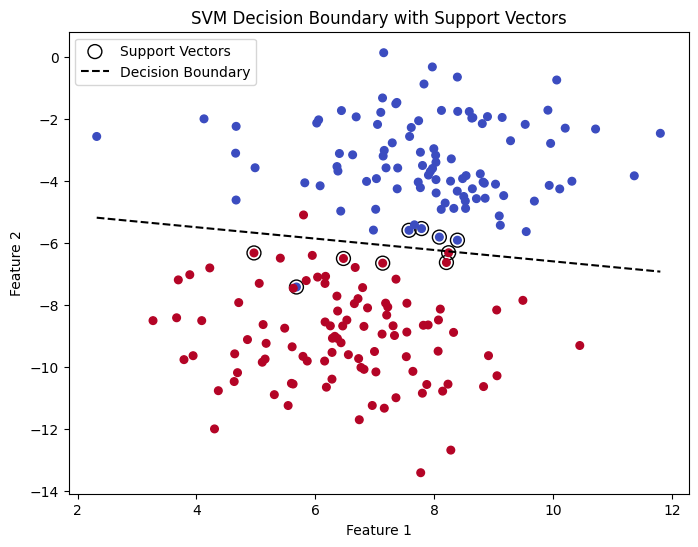

In [8]:
# Visualize the decision boundary
plt.figure(figsize=(8, 6))

# Plot decision boundary
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
x_points = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_points = -(w[0]/w[1])*x_points - b/w[1]

# Support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot data points and boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
plt.plot(x_points, y_points, color='black', linestyle='--', label='Decision Boundary')
plt.title("SVM Decision Boundary with Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


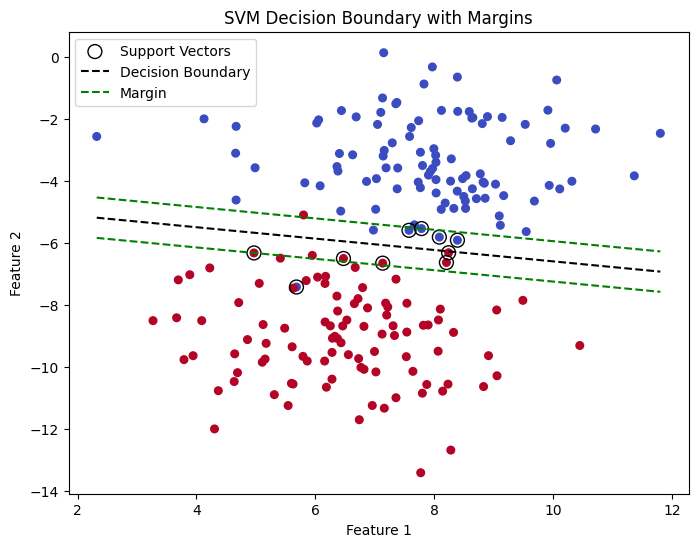

In [9]:
# Plot decision boundary + margins
plt.figure(figsize=(8, 6))

# Get coefficients
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

# Decision boundary line
x_points = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_decision = -(w[0]/w[1])*x_points - b/w[1]

# Margins (distance = 1/||w||)
margin = 1 / np.sqrt(np.sum(w ** 2))
y_margin_up = y_decision + np.sqrt(1 + (w[0]/w[1])**2) * margin
y_margin_down = y_decision - np.sqrt(1 + (w[0]/w[1])**2) * margin

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.plot(x_points, y_decision, 'k--', label='Decision Boundary')
plt.plot(x_points, y_margin_up, 'g--', label='Margin')
plt.plot(x_points, y_margin_down, 'g--')
plt.title("SVM Decision Boundary with Margins")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [10]:
decision_values = svm_model.decision_function(X_test)
print("Decision function values (distance from hyperplane):")
print(decision_values[:10])  # show first 10 test points


Decision function values (distance from hyperplane):
[-4.12809405  6.24151884  3.74085959  4.5028839   5.73480187  2.77057136
  2.12151606 -3.74234449 -7.01992762 -6.88322897]
